In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Labels

In [212]:
issues_labels = pd.read_csv("./issues_labels.csv", usecols=[1], squeeze=True, header=None)

### Labels and Issues Dataframe

In [213]:
ilpr = pd.read_csv("issues_label_per_row.csv", usecols=[1,2])
ilpr

,id,label
0,681010786,backport
1,681010786,v7.9.1
2,681010233,backport
3,681010233,v7.10.0
4,680841671,:ml
...,...,...
333525,1400233,:Distributed/Distributed
333526,1400233,>feature
333527,1400233,Team:Distributed
333528,1400233,high hanging fruit


### Tags

In [214]:
tagsDf = pd.read_csv("./tags.csv", usecols=[1,2])
tagsDf.head()

,Tag,Sha
0,v7.9.0,a479a2a7fce0389512d6a9361301708b92dff667
1,v7.8.1,b5ca9c58fb664ca8bf9e4057fc229b3396bf3a89
2,v7.8.0,757314695644ea9a1dc2fecd26d1a43856725e65
3,v7.7.1,ad56dce891c901a492bb1ee393f12dfff473a423
4,v7.7.0,81a1e9eda8e6183f5237786246f6dced26a10eaf


## Statistical analysis
* Quantify the number of issues and the its statistics over tags (mean, median, outliers)

In [228]:
tagsIssueCountDf.describe()

,Issues
count,280.000000
mean,163.996429
std,478.836250
min,0.000000
25%,13.000000
50%,32.000000
75%,90.000000
max,5707.000000


The percentiles (75th is 90) are low compared to the mean (163). This indicates the precense of outliers which influence the mean. Indeed the max value is very high with 5707 and a large standard deviation.

Let's plot these in a box plot to confirm our intuition

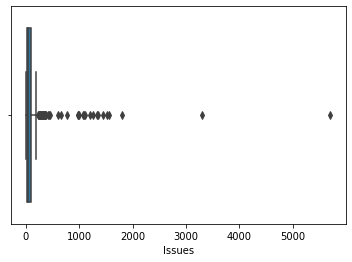

In [229]:
sns.boxplot(tagsIssueCountDf.Issues)

In [230]:
from matplotlib.cbook import boxplot_stats
outliers = [y for stat in boxplot_stats(tagsIssueCountDf.Issues) for y in stat['fliers']]
len(outliers)

45

The box plots confirms the presence of outlier. There are 45 of them. It means that there are 45 tags with many issues compared to most of the tags which have a mean around 163 and a median of 32. These could be possible very defected releases. Among these v7.0.0-beta1 results the tag with most issues.

In [218]:
outliersDf = tagsIssueCountDf.sort_values(by="Issues", ascending=False).head(45)
outliersDf

,Tag,Issues
25,v7.0.0-beta1,5707
145,v2.0.0-beta1,3311
18,v7.2.0,1806
0,v7.9.0,1553
76,v6.0.0-alpha1,1525
120,v5.0.0-alpha1,1441
7,v7.6.0,1358
4,v7.7.0,1331
13,v7.4.0,1267
51,v6.5.0,1193


26% of the outliers are alpha/beta/rc versions. The rests are official releases.

In [231]:
len(outliersDf[outliersDf.Tag.str.contains("alpha") |
               outliersDf.Tag.str.contains("rc") |
               outliersDf.Tag.str.contains("beta")]) / len(outliers)

0.26666666666666666

**Observation** The number of issue per each tag is not evenly distributed. A high concentration of tags with fewer than 100 issues while s 45 outliers exceed the 200 going all the way to 5707. Only 26% of these outliers are not filan releases (alpha beta and rc). The rest are official releases. 
The number of issues for these tags may depend on 
* How buggy these releases were
* How popular these releases were

### Explore the distribution of issues throughout the different tags
* Is the number of issues evenly distributed over the tags (and therefore over time)?
* What are the most issue reported versions? Are they concentrated in the some specific periods (first, last releases)?

In [220]:
# format data
tic = []
for tag in tags:
    tic.append((tag.name, len(ilpr[ilpr["label"]==tag.name].id.unique())))

In [221]:
# create a dataframe for easy manipulation
tagsIssueCountDf = pd.DataFrame(tic, columns=["Tag", "Issues"])

In [222]:
tagsIssueCountDf

,Tag,Issues
0,v7.9.0,1553
1,v7.8.1,409
2,v7.8.0,986
3,v7.7.1,346
4,v7.7.0,1331
...,...,...
275,v0.7.0,0
276,v0.6.0,0
277,v0.5.1,0
278,v0.5.0,0


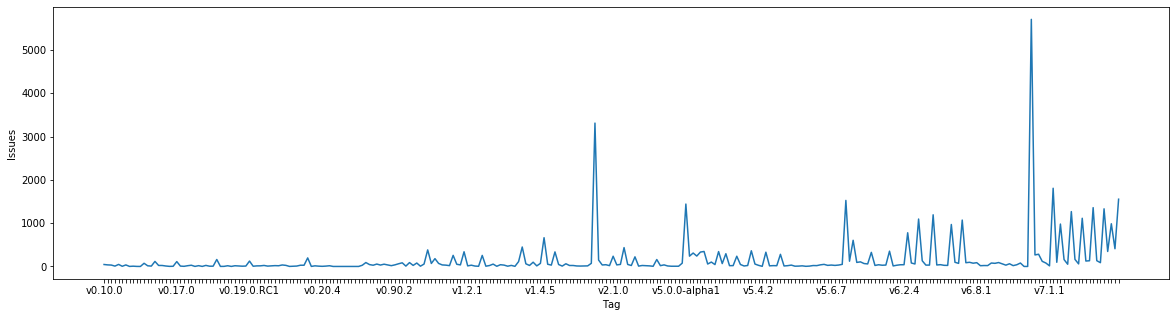

In [223]:
plt.figure(figsize=(20,5))
plt.locator_params(axis='x', nbins=6)
ax = sns.lineplot(x="Tag", y="Issues", data=tagsIssueCountDf.head(280))
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Let's investigate the first peak around version v1.0.0 at what tag it belongs to. We can see that it indeed belongs to  v1.0.0.

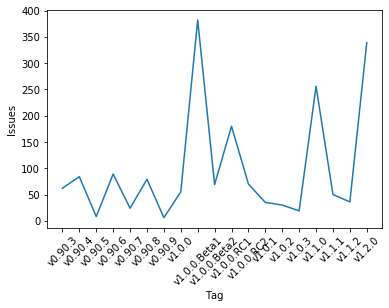

In [224]:
ax = sns.lineplot(x="Tag", y="Issues", data=tagsIssueCountDf[(tagsIssueCountDf.Tag < "v1.2.1") & (tagsIssueCountDf.Tag > "v0.90.2")])
ax.tick_params(axis='x', labelrotation= 45)

Let's compare the statistics of version below and above v1.0.0 to quantify the differences in number of issues

In [225]:
tagsIssueCountDf[(tagsIssueCountDf.Tag < "v1.0.0")].describe()

,Issues
count,88.000000
mean,26.306818
std,36.415974
min,0.000000
25%,4.000000
50%,14.000000
75%,32.000000
max,197.000000


In [226]:
tagsIssueCountDf[(tagsIssueCountDf.Tag >= "v1.0.0")].describe()

,Issues
count,192.000000
mean,227.104167
std,567.080832
min,0.000000
25%,21.000000
50%,49.000000
75%,159.250000
max,5707.000000


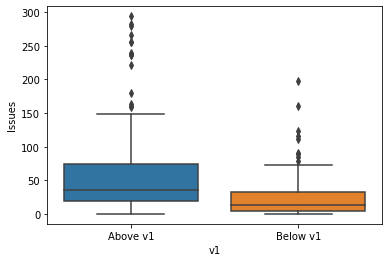

In [227]:
data = []
data.append(("Below v1", tagsIssueCountDf[(tagsIssueCountDf.Tag < "v1.0.0")].Issues.sum()))
data.append(("Above v1", tagsIssueCountDf[(tagsIssueCountDf.Tag >= "v1.0.0")].Issues.sum()))
tagsv1 = pd.DataFrame(tagsIssueCountDf.Issues)
tagsv1["v1"] = tagsIssueCountDf.Tag.apply(lambda tag: "Below v1" if tag < "v1.0.0" else "Above v1")
# Some outliers from Above v1 have been removed for readibility
ax = sns.boxplot(x="v1", y="Issues", data=tagsv1[tagsv1.Issues < 300])

***Observations***
By plotting the number of issues for each tag sorted in an ascending order, we notice that the versions up to roughly v1.0.0 have few issues compared to the versions coming after. Statistical summaries show that the mean of "below v1" is 26 whereas "above v1" is 227 which is even larger than the maximum value of "below v1". This shows an increasing trend of more issues with versions above v1.
This could be due to different reasons:

* Versions below v1.0.0 were not widely adopted and therefore received fewer issues from users
* Elasticsearch was not extensively using Github ITS as their main ITS
* Those versions presented indeed fewer issues, possibly due to the fewer features implemented

In two of the three scenarios identified, issues may be misleading in evaluating how buggy versions prior to v1.0.0 are.

### ToDo

* Plot ditribution of issue types per tag
* Plot distribution of issue types in general
* Does the number increase over time? (more in last releases? Sign of bias)
* Is there a trend in the types of issues that has become more popular?